# DM équations différentielles
**COMMUNAL Jean-Pierre Louis, LESBRE Viviane**

On fait les imports nécessaires :

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1:

On a le système 
$$
\left\{ \begin{array}{ll}
        \dot x_1 = x_1\cdot (\alpha - \beta x_2) \\
        \dot x_2 = -x_2\cdot (\gamma - \delta x_1) \\
    \end{array}
    \right.
  $$

  Donc on associe 
  * $x_1\alpha$ au taux de croissance du nombre de proies
  * $-\beta x_2 x_1$ à la diminution de cette variation à cuase de la chasse
  * $-x_2\gamma$ à la variation naturelle du nombre de prédateurs (ici une diminution)
  * $\delta x_1 x_2$ à l'augmentation de la population de prédateurs à cause de la chasse

  Pour chercher les points d'équilibre on résout :
  $$
\left\{ \begin{array}{ll}
        0 = x_1\cdot (\alpha - \beta x_2) \\
        0 = -x_2\cdot (\gamma - \delta x_1) \\
    \end{array}
    \right.
  \
\Leftrightarrow 
\
\left\{ \begin{array}{ll}
         x_1 = 0 \\
         x_2  = 0\\
    \end{array}
    \right.
    \text {ou}
\left\{ \begin{array}{ll}
         x_1 = \frac{\gamma}{\delta} \text {car $\delta \neq 0$}\\
         x_2 = \frac{\alpha}{\beta} \text {car $\beta \neq 0$}\\
    \end{array}
    \right.
  $$

On a donc deux points d'équilibres possibles $x_0=(0,0)$ et $\bar x = (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$

Pour la stabilité de ces points d'équilibres, on ne peut pas mettre le système sous forme d'un système linéaire de matrice du type $ \dot X =AX$ donc on ne peut rien conclure sur la stabilité.

## Question 2 :

On visualise le champ de vecteurs grâce à la fonction *quiver*, on calcule pour chaque point du plan les dérivées des coordonnées en fonction des coefficients *a,b,c,d*. On rappelle que $x_1$ et $x_2$ doivent être positifs. On trace aussi le portrait de phase des solutions :

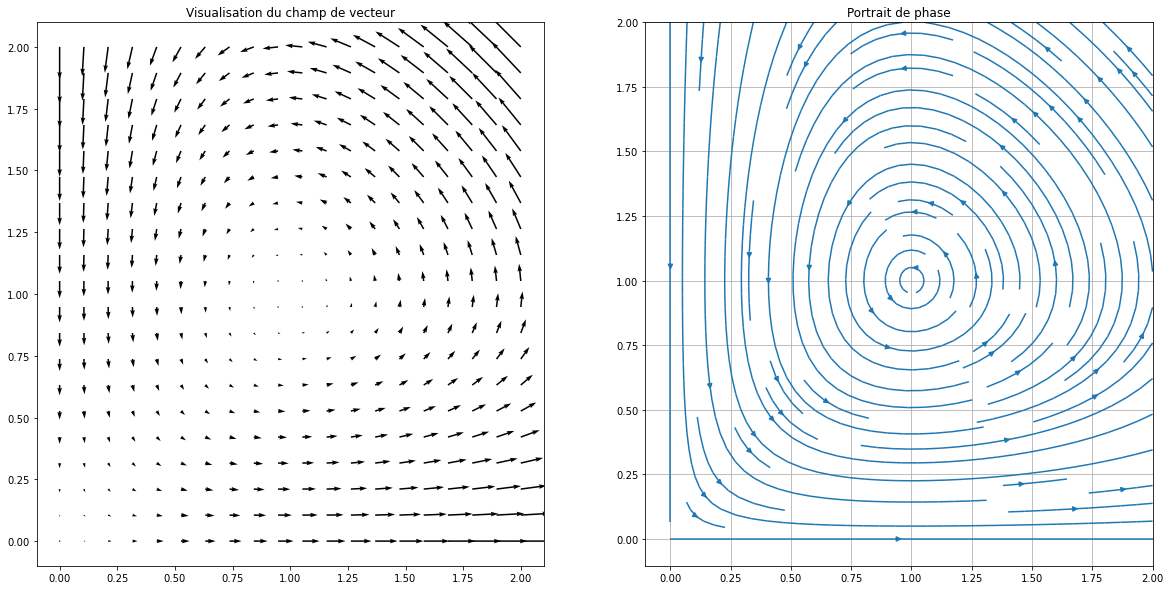

In [3]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))

plt.grid()
a = 1
b = 1
c = 1
d = 1

x_1 = np.linspace(0, 2, 20)
x_2 = np.linspace(0, 2, 20)
X,Y = np.meshgrid(x_1, x_2)
U =  X*(a-b*Y)
V = -Y*(c-d*X)
ax1.quiver(X,Y,U,V)
ax1.set_title('Visualisation du champ de vecteur')
ax2.streamplot(X,Y,U,V)
ax2.set_title('Portrait de phase');

Au vue de ces graphiques, on peut intuiter que les solutions vont converger vers le point d'équilibre $\bar x$ et non vers $x_0$.

## Question 3 :



## Question 6 :


In [49]:
def solver_explicite(f, x0, dt, t0, tf):
    dim_sol=len(x0)
    nb_time = int((tf-t0)/dt)
    time = np.linspace(t0, tf, nb_time)
    x = np.zeros(shape=(nb_time, dim_sol))
    x[0] = x0
    for i in range(len(time)-1):
        x[i+1] = x[i] + dt*f(x[i], time[i])
    return time, x

On teste cette fonction sur une équation différentielle dont on connaît la solution analytique: on cherche à résoudre $ \dot x= -2x$ les solutions de cette équation sont de la forme $x(t)= \lambda e^{-2t}$ avec la condition initiale $x_0=1$.

In [50]:
def f(x,t):
    return np.array([-2*x])
#f = np.vectorize(f)

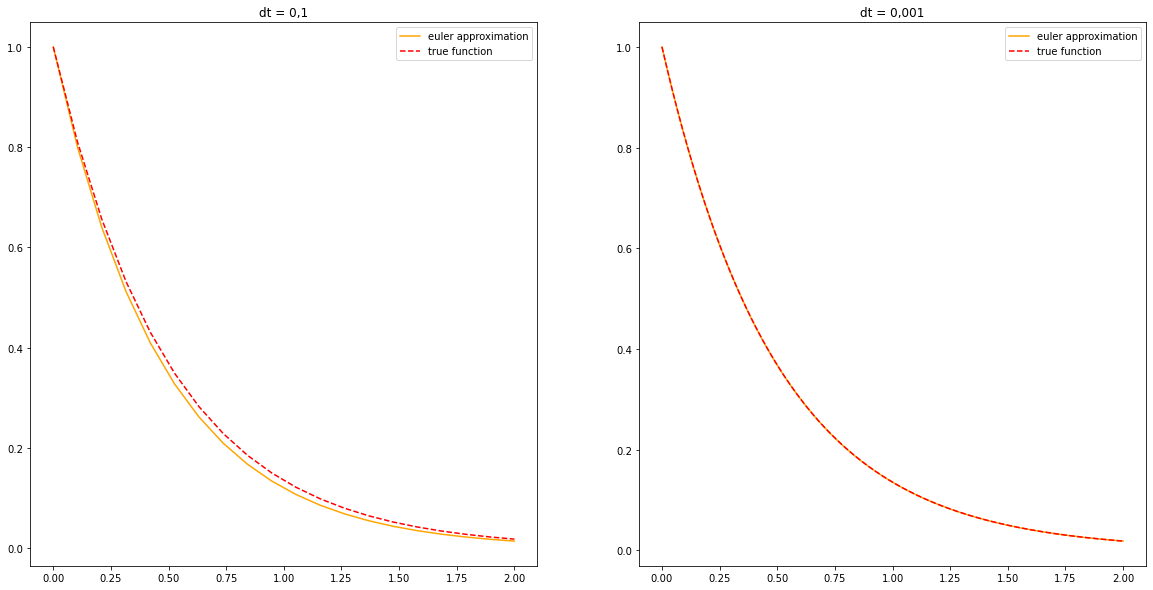

In [51]:
x0 = np.array([1])
dt = 0.1
t0 = 0
tf = 2
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (20,10))
time, x = solver_explicite(f, x0, dt, t0, tf)
ax1.plot(time,x,'orange', label = 'euler approximation')
ax1.plot(time,np.exp(-2*time),'r--', label = 'true function')
ax1.set_title('dt = 0,1')
ax1.legend()
dt = 0.001
time1, x1 = solver_explicite(f, x0, dt, t0, tf)
ax2.plot(time1,x1,'orange', label = 'euler approximation')
ax2.plot(time1,np.exp(-2*time1),'r--', label = 'true function')
ax2.set_title('dt = 0,001')
ax2.legend()
plt.show()

Les deux fonctions sont bien superposées, le programme Euler fonctionne. 

On s'interesse à la convergence du schéma d'Euler :
* on montre que le schéma d'Euler explicite est consistant d'ordre 1: 
on a $x_{j+1}=x_j+dt*\phi(t_j,x_j,dt)$ soit $x_{j+1}=x_j-2x_jdt$ donc $\phi(t,x,dt)=-2x$ dans notre cas un pas de temps constant. 
Avec $\forall (t,x) \in \mathbb{R}*\mathbb{R}^n, \ \phi(t,x,0) = f(t,x)$.Donc le schéma est explicite ici.
* de plus $f(x,t)=-2x \in C^1$ par rapport à $x$ 

On a alors une condition suffisante pour affirmer qu'il existe un pas de temps max $\Delta t_{max}>0$ tel que le schéma est convergent.

Visualisation graphique de l'ordre de convergence :

On calcule le maximum de l'erreur discrète:

error = np.max(np.abs(x-np.exp(-2*time)))
error

[-0.48 -0.09]


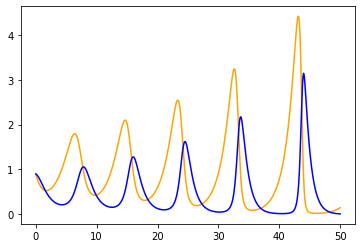

In [52]:
def Lotka_Volterra(x,t):
    alpha = 2/3
    beta = 4/3
    delta = 1
    gamma = 1
    x1, x2 = x[0], x[1]
    return np.array([x1*(alpha-beta*x2), -x2*(gamma-delta*x1)])

x0 = np.array([0.9, 0.9])
dt = 0.1
t0 = 0
tf = 50
print(Lotka_Volterra(x0, t0))
time, x = solver_explicite(Lotka_Volterra, x0, dt, t0, tf)
x = x.transpose()
plt.plot(time,x[0],'orange', label = 'Proies')
plt.plot(time,x[1],'blue', label = 'Prédateurs')
plt.show()
